### Import Needed Python Module

In [1]:
# tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

# python libraries
from PIL import Image
from pathlib import Path
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt

print("Finished module declaration,the current version of Tensorflow is: ", tf.__version__)

2024-05-06 13:50:44.300786: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 13:50:44.335414: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 13:50:44.335969: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 13:50:45.016202: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Finished module declaration,the current version of Tensorflow is:  2.12.0


### Date Preprocessing

In [2]:
# Directory
data_dir = Path('Garbage/original_images')

transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformer)

# display class names
print(dataset.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


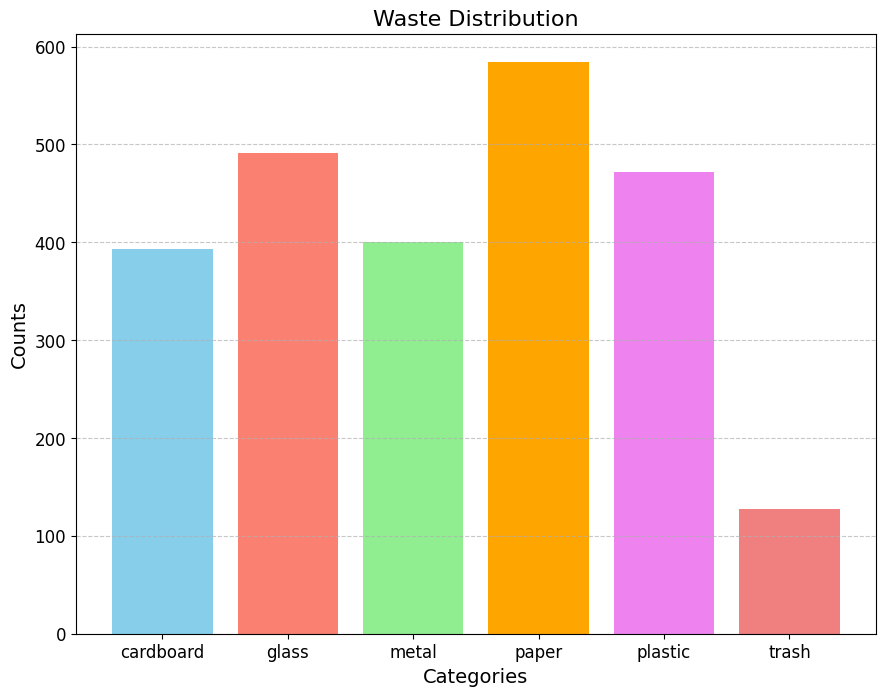

In [3]:
import matplotlib.pyplot as plt

# Display class distribution with custom colors and additional features
fig = plt.figure(figsize=(8, 6))  # Adjust figure size
ax = fig.add_axes([0, 0, 1, 1])
counts = [393, 491, 400, 584, 472, 127]
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'lightcoral']  # Custom colors
ax.bar(dataset.classes, counts, color=colors)  # Use custom colors
plt.title('Waste Distribution', fontsize=16)  # Add title with larger font size
plt.xlabel('Categories', fontsize=14)  # Add label to x-axis with larger font size
plt.ylabel('Counts', fontsize=14)  # Add label to y-axis with larger font size
plt.xticks(fontsize=12)  # Increase font size of x-axis ticks
plt.yticks(fontsize=12)  # Increase font size of y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines with dashed style
plt.show()


In [4]:
PATH_TEST = r"Garbage/original_images"
PATH_TRAIN = r"Garbage/processed_images"
class_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']

In [5]:
imagepath_cardboard = r"Garbage/original_images/cardboard"
graypath_cardboard = r"Garbage/processed_images/cardboard"
File_listing = os.listdir(imagepath_cardboard)
for file in File_listing:
    im = Image.open(imagepath_cardboard + '/' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_cardboard + '/' + file, "JPEG")

In [6]:
imagepath_glass = r"Garbage/original_images/glass"
graypath_glass = r"Garbage/processed_images/glass"
File_listing = os.listdir(imagepath_glass)
for file in File_listing:
    im = Image.open(imagepath_glass + '/' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_glass + '/' + file, "JPEG")

In [7]:
imagepath_metal = r"Garbage/original_images/metal"
graypath_metal = r"Garbage/processed_images/metal"
File_listing = os.listdir(imagepath_metal)
for file in File_listing:
    im = Image.open(imagepath_metal + '/' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_metal + '/' + file, "JPEG")

In [8]:
imagepath_paper = r"Garbage/original_images/paper"
graypath_paper = r"Garbage/processed_images/paper"
File_listing = os.listdir(imagepath_paper)
for file in File_listing:
    im = Image.open(imagepath_paper + '/' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_paper + '/' + file, "JPEG")

In [9]:
imagepath_plastic = r"Garbage/original_images/plastic"
graypath_plastic = r"Garbage/processed_images/plastic"
File_listing = os.listdir(imagepath_plastic)
for file in File_listing:
    im = Image.open(imagepath_plastic + '/' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_plastic + '/' + file, "JPEG")

In [10]:
imagepath_trash = r"Garbage/original_images/trash"
graypath_trash = r"Garbage/processed_images/trash"
File_listing = os.listdir(imagepath_trash)
for file in File_listing:
    im = Image.open(imagepath_trash + '/' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_trash + '/' + file, "JPEG")

In [11]:
train_dir = os.path.join(PATH_TRAIN)
test_dir = os.path.join(PATH_TEST)

In [12]:
imagepath_cardboard_dir = os.path.join(imagepath_cardboard)
imagepath_glass_dir = os.path.join(imagepath_glass)
imagepath_metal_dir = os.path.join(imagepath_metal)
imagepath_paper_dir = os.path.join(imagepath_paper)
imagepath_plastic_dir = os.path.join(imagepath_plastic)
imagepath_trash_dir = os.path.join(imagepath_trash)

In [13]:
len(os.listdir(PATH_TRAIN))

6

In [14]:
IMG_HEIGHT = 32
IMG_WIDTH = 32

In [15]:
image_gen = ImageDataGenerator(rescale=1./255)

In [16]:
train_data_gen = image_gen.flow_from_directory(
    directory = train_dir, 
    shuffle=True, 
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [17]:
test_data_gen = image_gen.flow_from_directory(
    directory = test_dir, 
    shuffle=True, 
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [18]:
#plt.figure()
#plt.imshow(sample_training_images[0])
#plt.show()
sample_data_gen = image_gen.flow_from_directory(
    directory = test_dir, 
    shuffle=True, 
    target_size = (200, 200),
    class_mode='categorical')

sample_training_images, _= next(sample_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1,4, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Found 2527 images belonging to 6 classes.


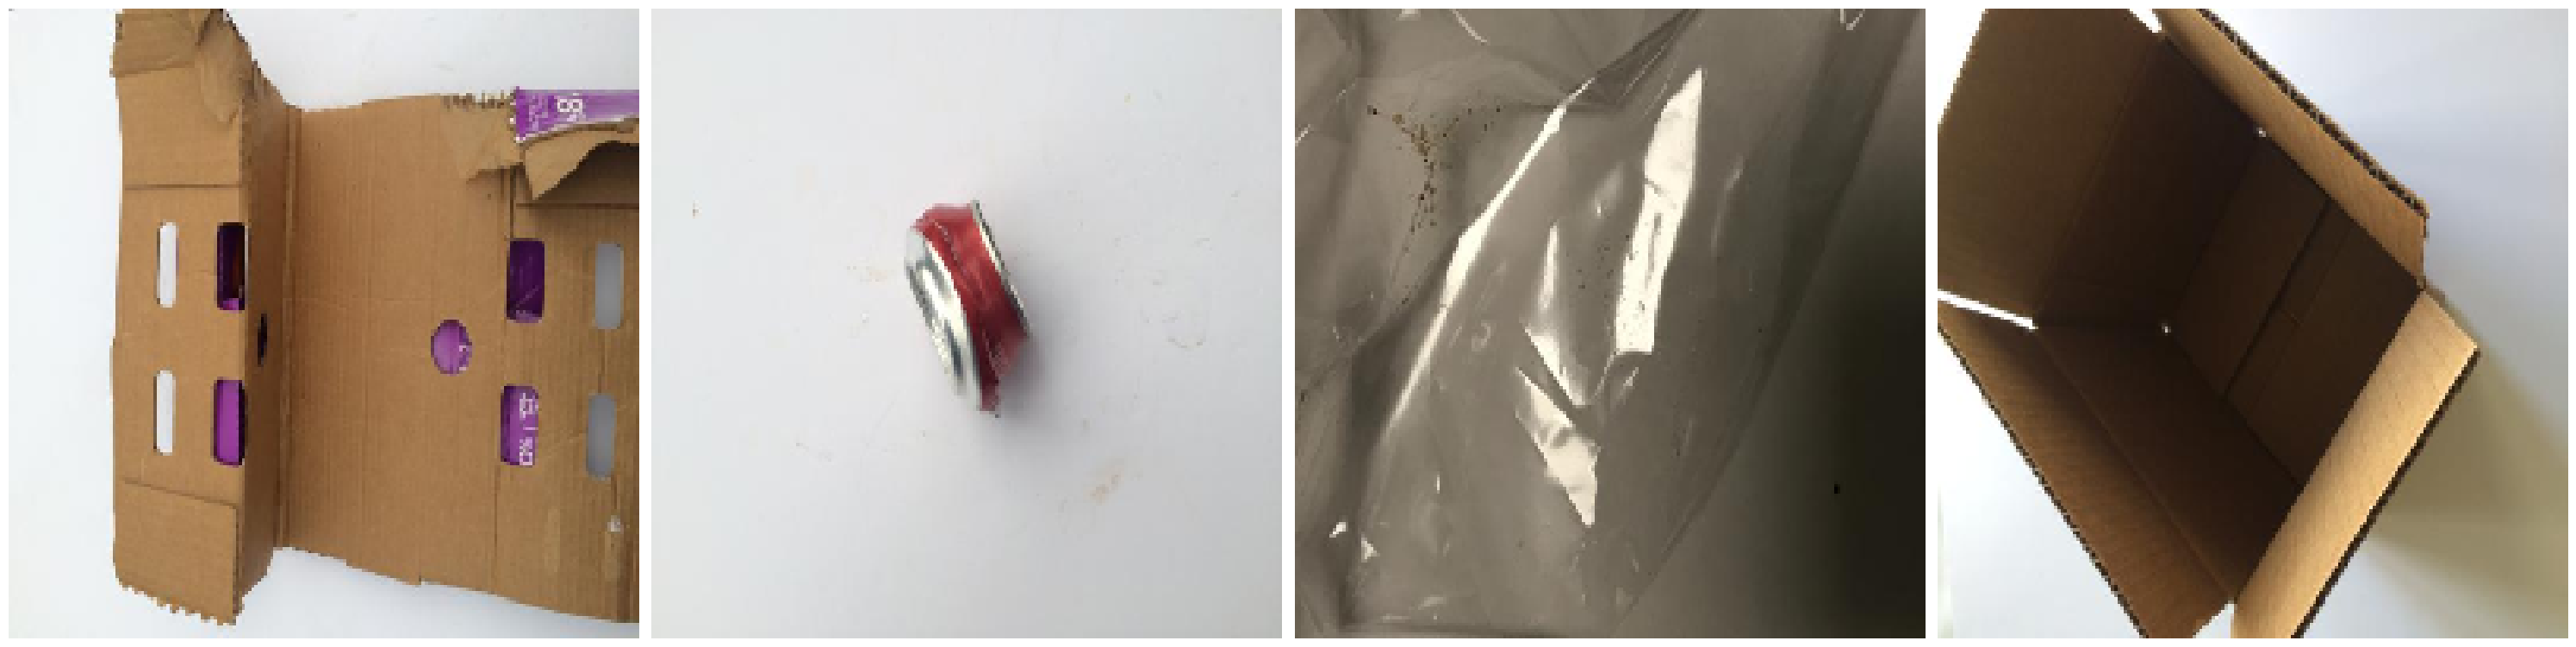

In [19]:
plotImages(sample_training_images[:4])

### CNN Model

In [20]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
def create_model():
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)  
    outputs = Dense(6, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

model = create_model()
model.save("garbage_model.h5")

2024-05-06 13:50:53.235623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-06 13:50:53.240226: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [21]:
batch_size = 45
epochs = 60
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856 

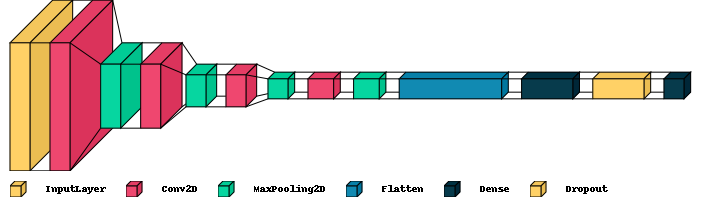

In [22]:
import visualkeras
visualkeras.layered_view(model, legend=True, spacing=20)

### Training

In [23]:
num_cardboard_train = len(os.listdir(imagepath_cardboard_dir))
num_glass_train = len(os.listdir(imagepath_glass_dir))
num_metal_train = len(os.listdir(imagepath_metal_dir))
num_paper_train = len(os.listdir(imagepath_cardboard_dir))
num_plastic_train = len(os.listdir(imagepath_glass_dir))
num_trash_train = len(os.listdir(imagepath_trash_dir))

num_cardboard_test = len(os.listdir(graypath_cardboard))
num_glass_test = len(os.listdir(graypath_glass))
num_metal_test = len(os.listdir(graypath_metal))
num_paper_test = len(os.listdir(graypath_paper))
num_plastic_test = len(os.listdir(graypath_plastic))
num_trash_test = len(os.listdir(graypath_trash))

total_train = num_cardboard_train + num_glass_train + num_metal_train + num_paper_train + num_plastic_train + num_trash_train
total_test = num_cardboard_test + num_glass_test + num_metal_test + num_paper_test + num_plastic_test + num_trash_test

In [24]:
history = model.fit(
    train_data_gen,
    validation_data = train_data_gen,
    steps_per_epoch= total_train // batch_size,
    epochs = epochs,
    validation_steps= total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.01,
                patience=7)]
)

2024-05-06 13:50:53.436850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/60


52/52 [==============================] - ETA: 0s - loss: 1.7403 - accuracy: 0.2061

2024-05-06 13:50:55.236840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


52/52 [==============================] - 2s 31ms/step - loss: 1.7403 - accuracy: 0.2061 - val_loss: 1.7034 - val_accuracy: 0.2338
Epoch 2/60
52/52 [==============================] - 1s 27ms/step - loss: 1.6708 - accuracy: 0.2682 - val_loss: 1.6004 - val_accuracy: 0.3025
Epoch 3/60
52/52 [==============================] - 1s 27ms/step - loss: 1.5585 - accuracy: 0.3271 - val_loss: 1.5106 - val_accuracy: 0.3778
Epoch 4/60
52/52 [==============================] - 1s 27ms/step - loss: 1.4912 - accuracy: 0.3854 - val_loss: 1.4226 - val_accuracy: 0.4258
Epoch 5/60
52/52 [==============================] - 1s 26ms/step - loss: 1.4362 - accuracy: 0.3999 - val_loss: 1.5933 - val_accuracy: 0.3270
Epoch 6/60
52/52 [==============================] - 1s 26ms/step - loss: 1.4392 - accuracy: 0.3999 - val_loss: 1.2980 - val_accuracy: 0.4900
Epoch 7/60
52/52 [==============================] - 1s 27ms/step - loss: 1.3617 - accuracy: 0.4612 - val_loss: 1.2666 - val_accuracy: 0.5073
Epoch 8/60
52/52 [======

**Step 9** : Evaluating the performance of the model using the test dataset.

In [25]:
test_loss, test_acc = model.evaluate(test_data_gen)
print('Test accuracy: {} Test Loss: {} '.format(test_acc*100, test_loss))

 6/79 [=>............................] - ETA: 1s - loss: 0.6759 - accuracy: 0.8490

2024-05-06 13:51:56.251284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 2s 25ms/step - loss: 0.3979 - accuracy: 0.8971
Test accuracy: 89.7111177444458 Test Loss: 0.39789754152297974 


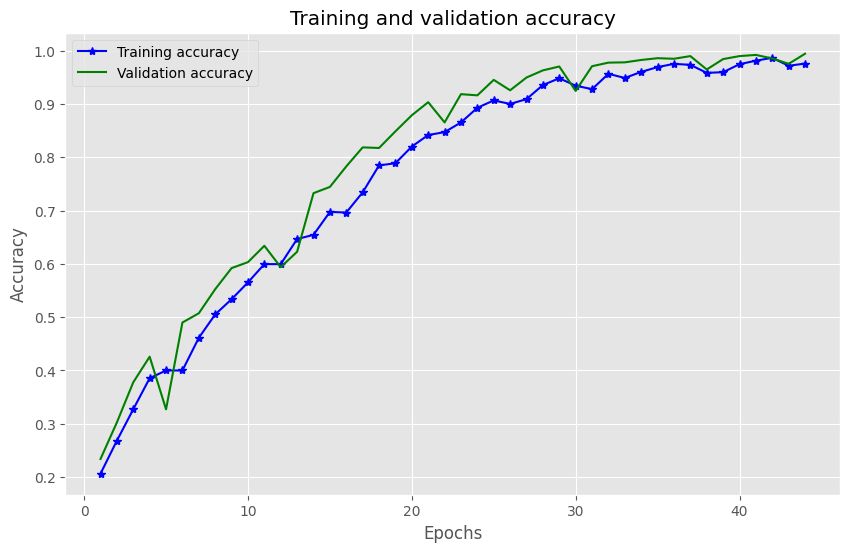

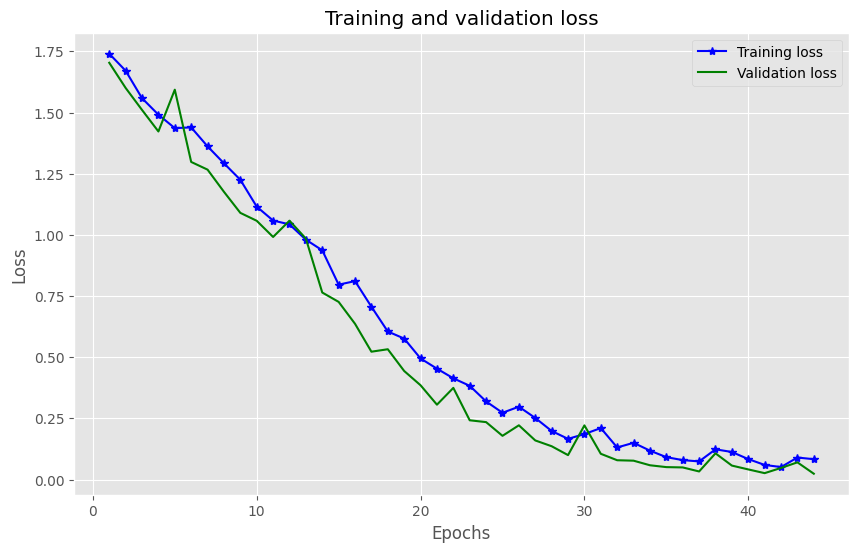

In [26]:
import seaborn as sns
train_acc = history.history['accuracy'] # store training accuracy in history
val_acc = history.history['val_accuracy'] # store validation accuracy in history
train_loss = history.history['loss'] # store training loss in history
val_loss = history.history['val_loss'] # store validation loss in history

epochs = range(1, len(train_acc) + 1)

plt.style.use('ggplot')

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'b*-', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b*-', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Below shows that the CNN successfully classifies majority of all different household garbage. However, there is a great probability to some classes that the model may mistake garbage with glass and metal, or paper and glass.

 8/79 [==>...........................] - ETA: 0s

2024-05-06 13:51:58.638229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 6/79 [=>............................] - ETA: 1s

2024-05-06 13:51:59.395165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 2s 24ms/step


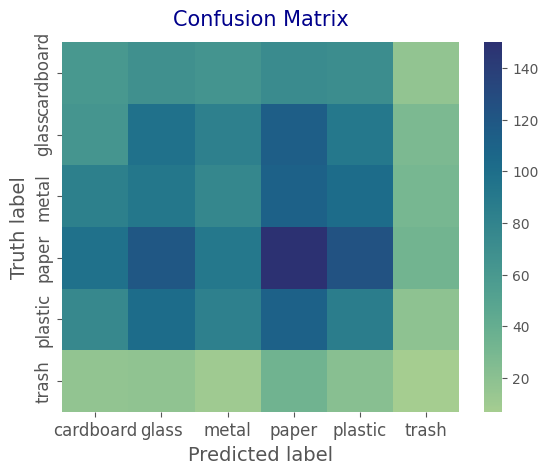

Classification Report
              precision    recall  f1-score   support

   cardboard       0.13      0.12      0.12       403
       glass       0.19      0.18      0.19       501
       metal       0.16      0.19      0.17       410
       paper       0.24      0.25      0.24       594
     plastic       0.20      0.20      0.20       482
       trash       0.03      0.02      0.02       137

    accuracy                           0.18      2527
   macro avg       0.16      0.16      0.16      2527
weighted avg       0.18      0.18      0.18      2527



In [27]:
#Confusion Matrix and Classification Report
import pandas as pd
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix

(X,y) = (train_data_gen[0], train_data_gen[1])
y_test = train_test_split(X,y,test_size=0.2, random_state=4)

nb_classes = 6
Y_train = model.predict(train_data_gen)
y_train = np.argmax(Y_train, axis=1)
Y_test = model.predict(test_data_gen)
y_test = np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_train)

#visualize confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_train)), ('cardboard', 'glass', 'metal','paper','plastic','trash'),
                      ('cardboard', 'glass', 'metal','paper','plastic','trash'))

heatmap = sns.heatmap(matrix, annot = False, annot_kws = {'size': 14}, fmt = 'd', cmap = 'crest')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15, pad = 12, color = 'darkblue')
plt.ylabel('Truth label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

print('Classification Report')
target_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']
print(classification_report(train_data_gen.classes, y_test, target_names=target_names,zero_division=0))

In [28]:
# to identify the accuracy of each class 
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Overall accuracy
print ("Cardboard Glass Metal Paper Plastic Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)

Cardboard Glass Metal Paper Plastic Trash
[0.75029679 0.69172932 0.70320538 0.64028492 0.68302335 0.90977444]


### Display Predictions (Random Images)

In [29]:
from skimage.transform import resize 

In [30]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np
number_to_class = ['cardboard',\
                   'glass',\
                   'metal',
                   'paper',\
                   'plastic',\
                   'trash',]

1/1 [==============================] - 0s 12ms/step


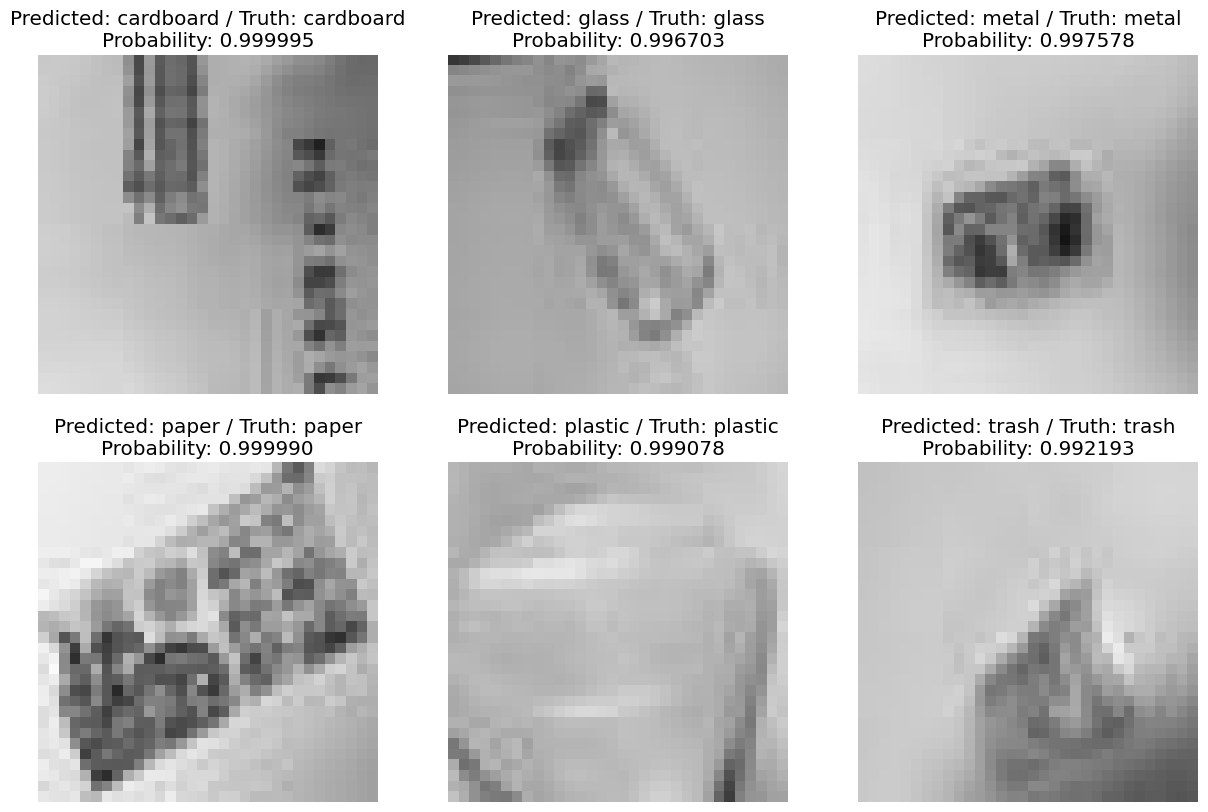

In [31]:
test_images = [
    'Garbage/processed_images/cardboard/cardboard_321.jpg',
    'Garbage/processed_images/glass/glass_169.jpg',
    'Garbage/processed_images/metal/metal_069.jpg',
    'Garbage/processed_images/paper/paper_269.jpg',
    'Garbage/processed_images/plastic/plastic_169.jpg',
    'Garbage/processed_images/trash/trash_069.jpg'
]

number_to_class = [
    'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'
]

plt.figure(figsize=(15, 15))
for i, test_img in enumerate(test_images):
    img = ku.load_img(test_img, target_size=(32, 32))
    img = ku.img_to_array(img, dtype=np.uint8)
    img = np.array(img) / 255.0
    prediction = model.predict(img[np.newaxis, ...])
    predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
    probability = np.max(prediction[0], axis=-1)
    truth = test_img.split('/')[3].split('_')[0]  # Extract the true label from the image path
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img.squeeze())
    plt.title(f"Predicted: {predicted_class} / Truth: {truth}\nProbability: {probability:.6f}")
    plt.axis('off')

plt.show()

1/1 [==============================] - 0s 16ms/step


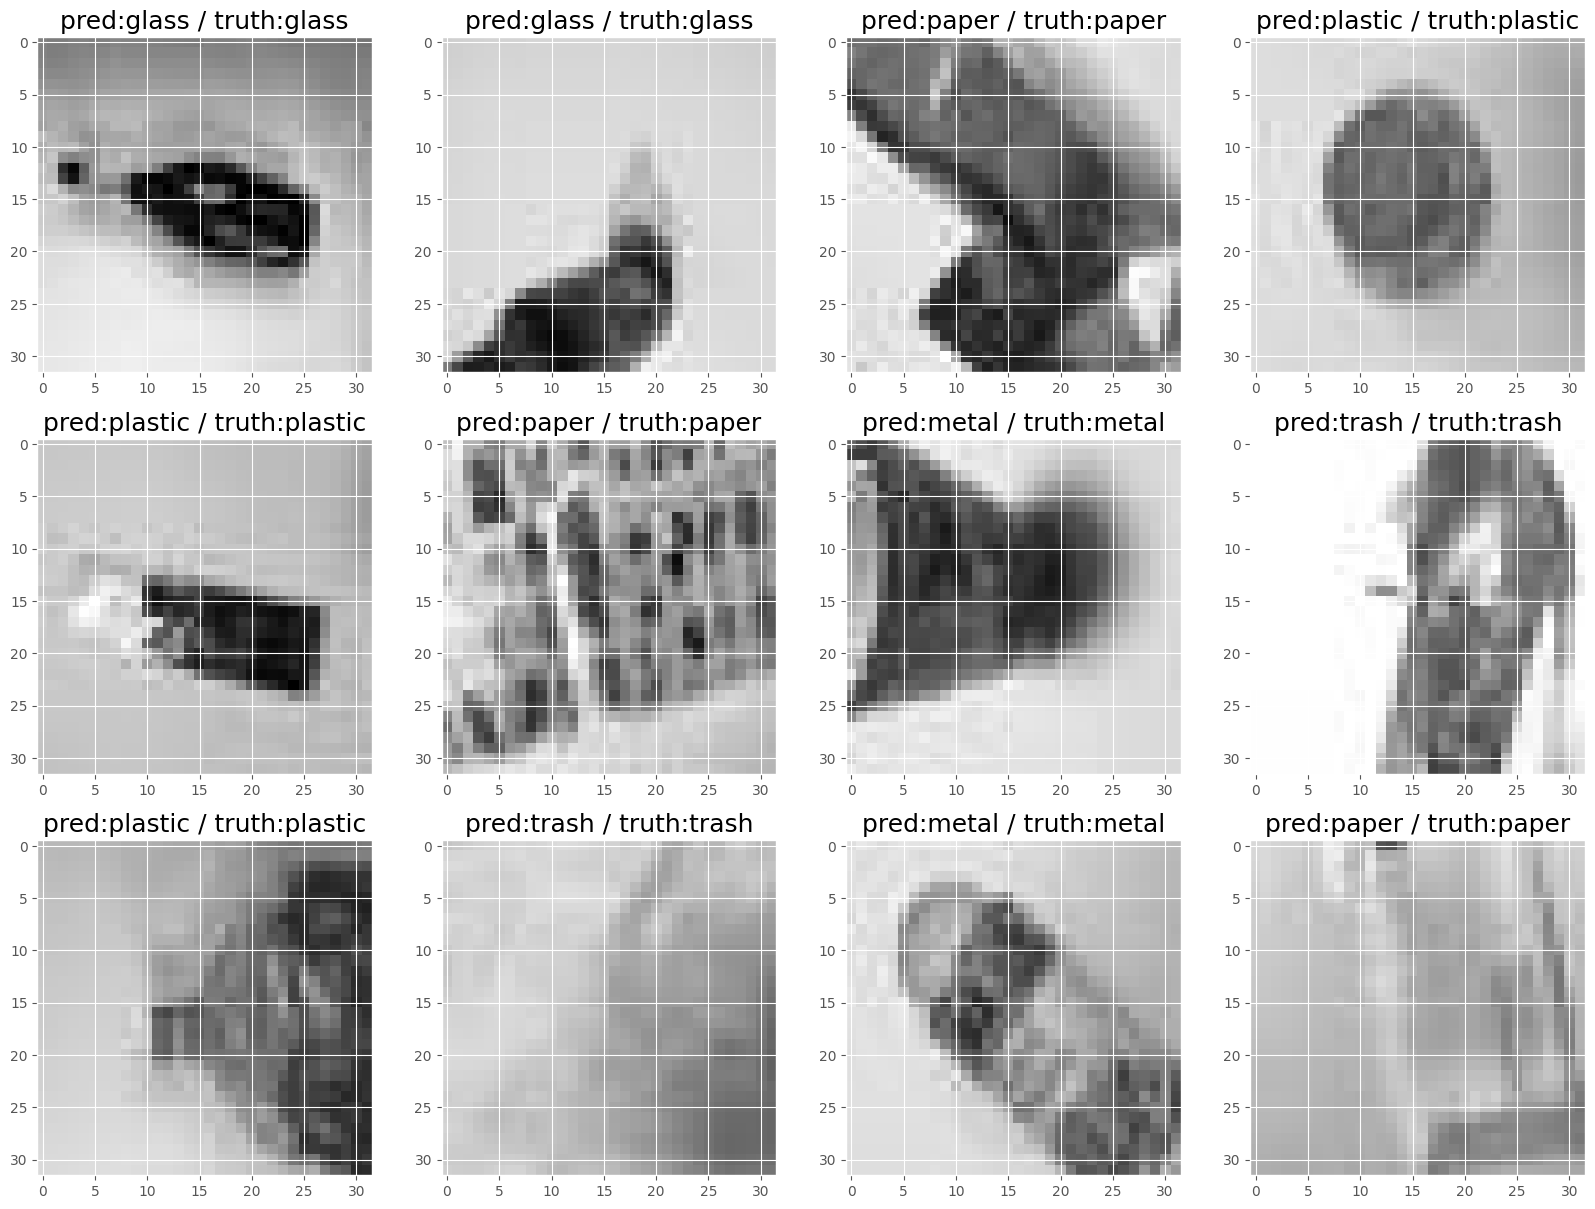

In [32]:
test_x, test_y = train_data_gen.__getitem__(1)
# test_x is used to train the data
# test_y refers to the actual answer of the testing set data
# preds refers to the predicted class
preds = model.predict(test_x)

plt.figure(figsize=(20, 20))
for i in range(12):
    plt.subplot(4,4, i+1)
    plt.title('pred:%s / truth:%s' % (number_to_class[np.argmax(preds[i])], number_to_class[np.argmax(test_y[i])]), size=18)
    plt.imshow(test_x[i])
#shows some testing results

---
### Class: Cardboard

---

1/1 [==============================] - 0s 14ms/step
Probability: 0.999995
Classified: cardboard 
 cardboard


Text(0.5, 1.0, 'Loaded Image')

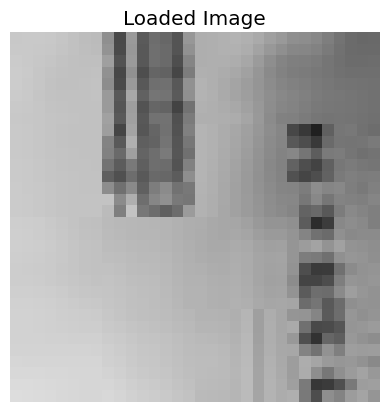

In [33]:
test_img = 'Garbage/processed_images/cardboard/cardboard_321.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n' , number_to_class[np.argmax(test_img[0])])

plt.axis('off')
plt.imshow(img.squeeze())
plt.imshow(img)
plt.title("Loaded Image")

---
### Class: Glass

---

1/1 [==============================] - 0s 13ms/step
Probability: 0.9998148
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

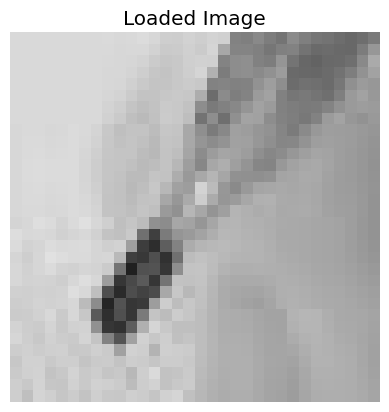

In [34]:
test_img = 'Garbage/processed_images/glass/glass_341.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Metal
---

1/1 [==============================] - 0s 12ms/step
Probability: 0.9999974
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

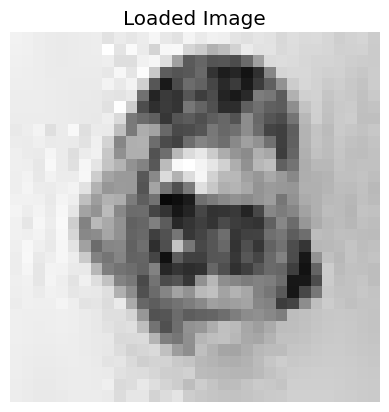

In [35]:
test_img = 'Garbage/processed_images/metal/metal_100.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Paper

---

1/1 [==============================] - 0s 12ms/step
Probability: 0.99852175
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

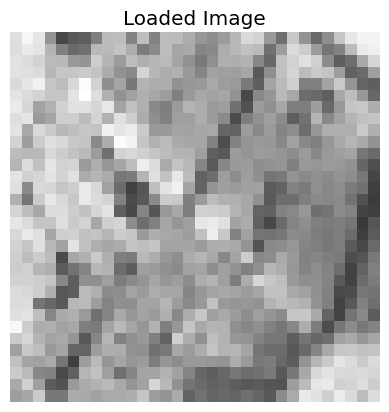

In [36]:
test_img = 'Garbage/processed_images/paper/paper_324.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Plastic

---

1/1 [==============================] - 0s 12ms/step
Probability: 0.99980944
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

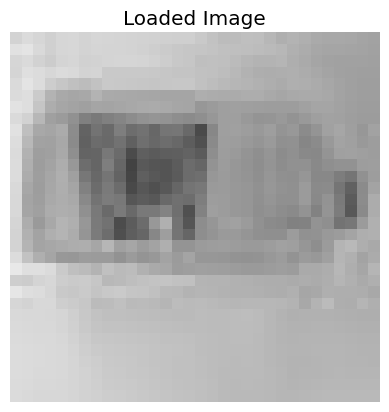

In [37]:
test_img = 'Garbage/processed_images/plastic/plastic_155.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Trash
---

1/1 [==============================] - 0s 12ms/step
Probability: 0.9901134
Classified: trash 



Text(0.5, 1.0, 'Loaded Image')

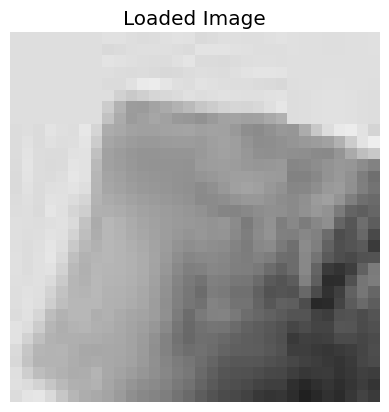

In [38]:
test_img = 'Garbage/processed_images/trash/trash_032.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

1/1 [==============================] - 0s 12ms/step


Probability: 0.9901134
Classified: trash 



Text(0.5, 1.0, 'Loaded Image')

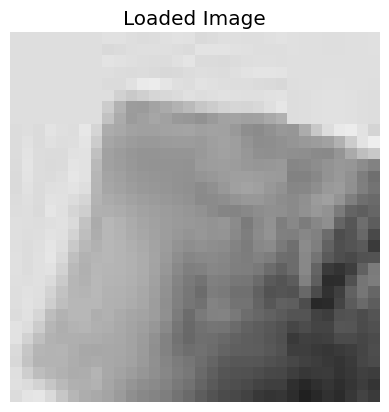

In [39]:
test_img = 'Garbage/processed_images/trash/trash_032.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")